### Feature Engineering 
    Feature engineering refers to manipulation — addition, deletion, combination, mutation — of our data set to improve machine learning model training, leading to better performance and greater accuracy. Effective feature engineering is based on sound knowledge of the business problem and the available data sources.   

### -------------------------Data Selection--------------------------------

- ##### Importing necessary libraries

In [76]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

- ##### Getting dataset 

In [22]:
#Data set 
dataset_download_url = "https://raw.githubusercontent.com/Tanweer-Raza/data_set_for_project/main/insurance.csv"
data_set = pd.read_csv(dataset_download_url)
data_set.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [23]:
data_set.shape

(1338, 7)

### -------------------------Data Preprocessing--------------------------------

**--->Data CLeaning**

`1. Handling missing values`

In [24]:
data_set.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

Report :  Here no null or missing values are present.

`2. Handling duplicates`

In [25]:
data_set.duplicated().sum()

1

In [26]:
data_set.drop_duplicates(inplace = True)

In [27]:
data_set.shape

(1337, 7)

Report : One duplicate row was present. so we dropped that row . So now shape of the dataset has become 1337 x 7

In [28]:
data_set.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

**Types of features**

- Numerical features

In [64]:
numerical_features = [i for i in data_set.columns if data_set[i].dtypes != 'object']
numerical_features

['age', 'bmi', 'children', 'expenses']

-  Categorical features

In [65]:
categorical_features = [i for i in data_set.columns if i not in numerical_features]
categorical_features

['sex', 'smoker', 'region']

- Discrete features

In [31]:
discrete_features = [i for i in numerical_features if len(data_set[i].unique())<= 30]
discrete_features

['children']

In [32]:
continous_features = [i for i in numerical_features if i not in discrete_features]
continous_features

['age', 'bmi', 'expenses']

**---> Dealing with Multicollinearity**

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated.

##### `Heatmap`

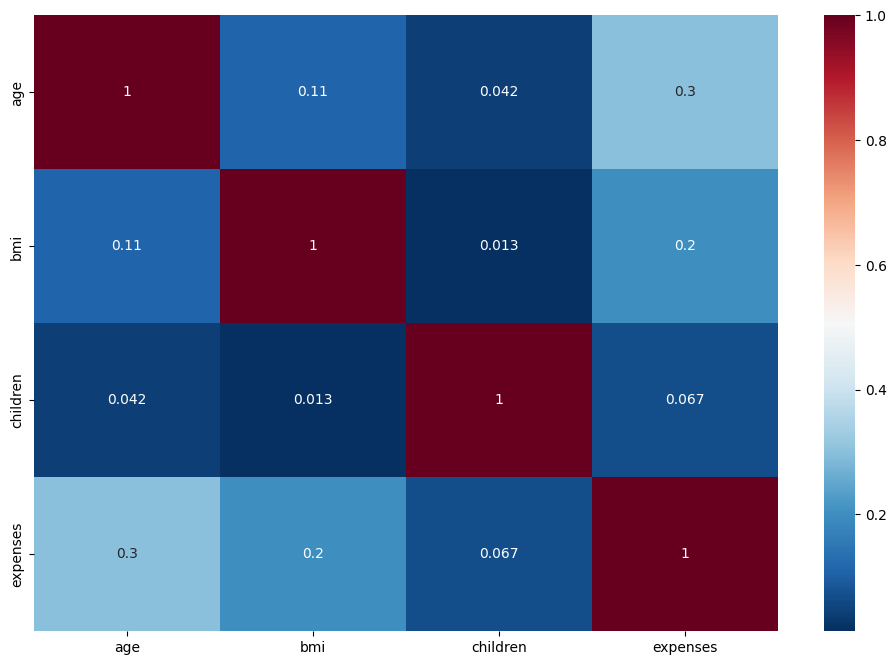

In [33]:
plt.figure(figsize= (12,8))
sns.heatmap(data_set.corr() ,annot = True, cmap='RdBu_r')
plt.show()

**Conclusion** 
* From above heatmap plot no multicollinearity found. So here we dont need to deal with the problem of multicollinearity here .

### ----------------------------Feature Transformation(FE)--------------------------------

**---> Outliers detection and handling**



Outliers are those data points which differs significantly from other observations present in given dataset. It can occur because of variability in measurement and due to misinterpretation in filling data points. Ouliers can very high impact on few Machine learning models.Can Cause bias in the output.

Most common causes of outliers on a data set:

1) Data Entry Errors: Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.

2) Measurement Error (instrument errors): It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.

3) Experimental errors (data extraction or experiment planning/executing errors)

4) Intentional (dummy outliers made to test detection methods)

5) Data processing errors (data manipulation or data set unintended mutations)

6) Natural Outlier (not an error, novelties in data): When an outlier is not artificial (due to error), it is a natural outlier. Most of real world data belong to this category.

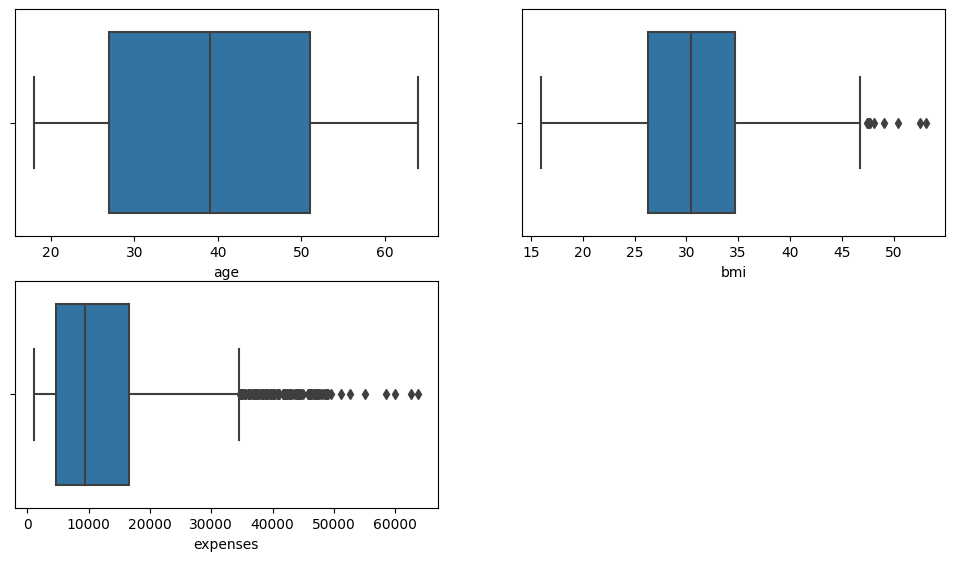

In [34]:
plt.figure(figsize=(12,10))
for i in range(0,len(continous_features)):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x = data_set[continous_features[i]])
    plt.xlabel(continous_features[i])
   

Here we have some outliers in bmi column and more outliers in expenses column so we will handle outlier in these two.

Outliers Capping:

- Outliers capping is widely used while handling outliers.

- Capping converts the outliers and bring them in the limit or range of our data. 

- Capping in a sense is similar to trimming the dataset, but the difference here is, while trimming we used IQR or z-score and trimmed the data based on some IQR or z-score value. Here instead of trimming or removing the values from the dataset, we convert the outliers and bring them in the limit or range of our data.

- Here we will use outliers capping for handling outliers.


IQR For Outlier Handling :
* For Skewed distributions: Use Inter-Quartile Range (IQR) proximity rule.

* The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

* where Q1 and Q3 are the 25th and 75th percentile of the dataset respectively, and IQR represents the inter-quartile range and given by Q3 – Q1.

* percentile can be calculated for a column using `column_name.quantile(0.25 or  0.75)`

In [35]:
## Checking skewness 
outliers_features = ['bmi' , 'expenses'] #  As we have outliers in bmi and expenses columns
data_set[outliers_features].skew(axis=0 , skipna=True)

bmi         0.284463
expenses    1.515391
dtype: float64

Now we will  use outliers capping for handling the outliers and then check the skewness of our data after that.

In [40]:
for outliers in outliers_features:
    p25 = data_set[outliers].quantile(0.25)
    p75 = data_set[outliers].quantile(0.75)
    
    iqr = p75 - p25
    
    data_upper_limit = p75 + 1.5 * iqr
    data_lower_limit = p25 - 1.5 * iqr
    print(f"For ----{outliers}---")
    print("Upper limit",data_upper_limit)
    print("Lower limit",data_lower_limit)

    print(f"No.of outliers above upper limit is {len(data_set.loc[(data_set[outliers]> data_upper_limit), outliers])}")
    print(f"No.of outliers below lower limit is {len(data_set.loc[(data_set[outliers] < data_lower_limit), outliers])}")
    print(f"Total no.of outliers are {len(data_set.loc[(data_set[outliers]> data_upper_limit), outliers]) + len(data_set.loc[(data_set[outliers] < data_lower_limit), outliers])}")

    data_set.loc[(data_set[outliers]> data_upper_limit), outliers] = data_upper_limit
    data_set.loc[(data_set[outliers]< data_lower_limit), outliers] = data_lower_limit
    


For ----bmi---
Upper limit 47.300000000000004
Lower limit 13.699999999999998
No.of outliers above upper limit is 9
No.of outliers below lower limit is 0
Total no.of outliers are 9
For ----expenses---
Upper limit 34524.79
Lower limit -13120.73
No.of outliers above upper limit is 139
No.of outliers below lower limit is 0
Total no.of outliers are 139


In [41]:
data_set[outliers_features].skew(axis=0 , skipna= True)

bmi         0.233132
expenses    1.084698
dtype: float64

Here we can clearly see that skewness has  decreeased for both "bmi" and "expenses" columns
Lets see with the help of plot.

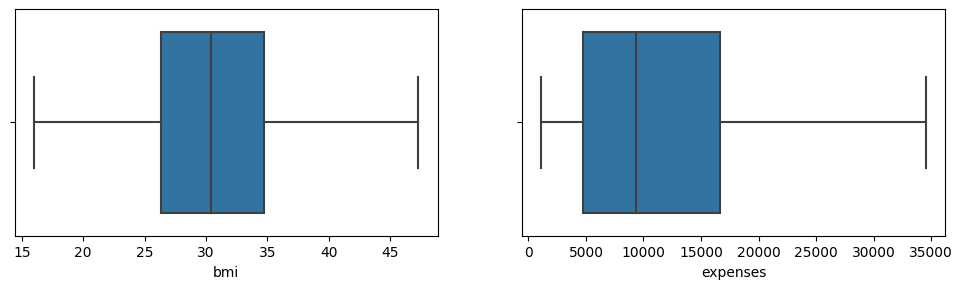

In [42]:
plt.figure(figsize=(12,10))
for i in range(0,len(outliers_features)):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x = data_set[outliers_features[i]])
    plt.xlabel(outliers_features[i])

Here outliers are handled with the help of outliers capping method using IQR.

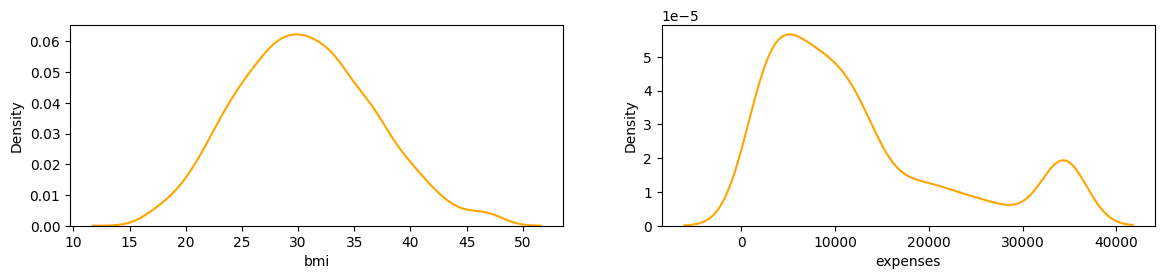

In [56]:
plt.figure(figsize=(14, 12))
for i, outlier in enumerate(outliers_features):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(x=data_set[outlier], color='orange')
    plt.xlabel(outlier)

Before outliers handling the above plots were not normally distributed. Expense plot was like power law shaped. Now after outliers capping the 
distribution of the data now in Normal .

**---> Feature Encoding and Feature Scaling**

Now we will do `encoding` using `OneHotEncoder` for our categorical features as machine learnig only understands numbers. 
We will also do `feature scaling` of our numerical features using `SatandardScalar`.

But before that we need to split our data into independent columns (varibale `X` ) and dependent column (variable `y `).Lets do that

#### Feature Selection

In [73]:
#Splitting data in to independent and dependent columns X, y 

X = data_set.drop(['expenses'] , axis = 1)
y = data_set['expenses']

In [74]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest


In [75]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [66]:
numerical_features_tr = X.select_dtypes(exclude="object").columns
categorical_features_tr = X.select_dtypes(include= "object").columns

Now we will use Column Transformer Tbecause this estimator allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space.
This estimater takes list of tuples (name, transformer, columns)  specifying the transformer objects to be applied to subsets of the data.

In [82]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

st_scalar = StandardScaler()
one_encoder = OneHotEncoder()

preprocessor = ColumnTransformer(
    [("OneHotencoder", one_encoder, categorical_features_tr),
    ("StandardScaler" , st_scalar , numerical_features_tr)]
)

X = preprocessor.fit_transform(X)

#### Train and test split

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [85]:
X_train.shape, X_test.shape

((1069, 11), (268, 11))

#### Model Selection

* Now we will use various regressions models but for now we will use default values i.e without hyper parameter tunning.

* We will also chose the best parameter for our model . i.e hyper parameter tunning . and try to get the better result as compared to without hyper parameter tunnning.

*  For evaluating the quality of predictions we will use :
    1) mean absoulte error
    2) mean squared error 
    3) root mean squared error
    4) R2 score



In [86]:
# Creating function to evaluate our models

from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score

def model_evaluation(true_value, predicted_value):
    mae = mean_absolute_error(true_value, predicted_value)
    mse = mean_squared_error(true_value, predicted_value)
    rmse = np.sqrt(mean_squared_error(true_value, predicted_value))
    r2_square = r2_score(true_value, predicted_value)
    return mae, mse,rmse, r2_square

In [134]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

from catboost import CatBoostRegressor
from xgboost import XGBRegressor

model_list = [LinearRegression() ,
          Ridge() , 
          Lasso() ,
          KNeighborsRegressor(),
          RandomForestRegressor(), 
          DecisionTreeRegressor(),  
          CatBoostRegressor(verbose=False) ,
          XGBRegressor(),
          AdaBoostRegressor()
          ]



In [137]:
r2 = []
model_list_name = ["Linear Regression", "Ridge", "Lasso", "KNeighbors Regressor","Random Forest Regressor", "Decision Tree Regressor" , "Cat Boost Regressor", "XGB Regressor", "AdaBoostRegressor"]
for model in range(len(model_list)) :

    # Training our model
    model_list[model].fit(X_train, y_train)

    # Making predictions
    y_train_predicted = model_list[model].predict(X_train)
    y_test_predicted = model_list[model].predict(X_test)

    # Evaluating train and test dataset
    model_train_mae , model_train_mse, model_train_rmse, model_train_r2 = model_evaluation(y_train, y_train_predicted)
    model_test_mae , model_test_mse, model_test_rmse, model_test_r2 = model_evaluation(y_test, y_test_predicted)

    r2.append(model_test_r2)
    
    print(model_list_name[model])
    print('Model performance for Training set')

    print(f"---> Mean Absolute Error: {model_train_mae}")
    print(f"---> Mean Squared Error: {model_train_mse}")
    print(f"---> Root Mean Squared Error: {model_train_rmse}")
    print(f"---> R2 Score: {model_train_r2}")

    print("__________________________________________________________")
    
    print('Model performance for Test set')


    print(f"---> Mean Absolute Error: {model_test_mae}")
    print(f"---> Mean Squared Error: {model_test_mse}")
    print(f"---> Root Mean Squared Error: {model_test_rmse}")
    print(f"---> R2 Score: {model_test_r2}")

    
    print('*'*45)
    print('\n')




Linear Regression
Model performance for Training set
---> Mean Absolute Error: 3432.8403086997196
---> Mean Squared Error: 27413965.394824605
---> Root Mean Squared Error: 5235.834737157448
---> R2 Score: 0.7251781990906823
__________________________________________________________
Model performance for Test set
---> Mean Absolute Error: 3163.355820895523
---> Mean Squared Error: 21072641.718892537
---> Root Mean Squared Error: 4590.494713959764
---> R2 Score: 0.8196664435065001
*********************************************


Ridge
Model performance for Training set
---> Mean Absolute Error: 3434.716128795149
---> Mean Squared Error: 27397129.46272969
---> Root Mean Squared Error: 5234.226730160787
---> R2 Score: 0.7253469773433603
__________________________________________________________
Model performance for Test set
---> Mean Absolute Error: 3160.1998911045234
---> Mean Squared Error: 20945337.88645869
---> Root Mean Squared Error: 4576.607683258277
---> R2 Score: 0.820755872784722

`Result (r2 score) of all models at one place`

In [143]:
pd.DataFrame(zip(model_list_name, r2) ,columns= ["Model" , "R2_square"]).sort_values(by=['R2_square'], ascending= False).reset_index(drop=True)

,Model,R2_square
0,Cat Boost Regressor,0.854920
1,Random Forest Regressor,0.847792
2,AdaBoostRegressor,0.839240
3,Lasso,0.820998
4,Ridge,0.820756
5,Linear Regression,0.819666
6,XGB Regressor,0.807902
7,KNeighbors Regressor,0.775354
8,Decision Tree Regressor,0.740397


Here we can use top three with high r2 square score for hyper parameter tunning in order to improve the score.
So we will use 	Random Forest Regressor,Cat Boost Regressor and AdaBoostRegressor.